## Lab: Datasets & NumPy - csv's, funciones, numpy y distribuciones

Ejecuta la celda de abajo para cargar los paquetes requeridos

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline

### Datos de ventas

Para este Lab vamos a usar una versión resumidade un dataset que contiente información sobre ventas de establecimientos económicos que analizaremos en detalle más adelante.

El csv tiene alrededor de 200 filas de datos y 4 columnas. El path especificado del csv ```sales_info.csv``` asume que se encuentra en el mismo directorio que la presente notebook. En caso que lo hayas descargado en otro directorio deberás hacer referencia de manera relativa o absoluta (googlear linux path examples relativa / absolute).

In [2]:
sales_csv_path = 'sales_info.csv'

#### 1. Carga de datos

Crear una lista vacía llamada ```rows```.

Utilizando  el patrón para cargar csv's que ya vimos en encuentros anteriores, levantar todas las filas del csv a la lista ```rows```.


Como referencia, el patrón es:
```python
with open(my_csv_path, 'r') as f:
    reader = csv.reader(f)
    ...
```

Más allá de esto, el trabajo de agregar las filas del archivo csv a la lista  ```rows``` es todo tuyo :)

In [3]:
rows = []

with open(sales_csv_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)

#### 2. Separar el encabezado y los datos

El encabezado del csv está contenido en el primer índice de la variable ```rows```, dado que es la primera fila en el archivo csv.

Utilizar indexación de Python (ver slicing en https://docs.python.org/2/tutorial/introduction.html) para crear dos nuevas variables: ```header``` que contiene las títulos o nombres de las 4 columnas y ```data``` que contiene la lista de listas. A su vez, cada sublista representa una fila del csv.

Por último, imprimir ```header``` para ver los nombres de las columnas.

In [6]:
header = rows[0]
data = rows[1:]
print(header)

['volume_sold', '2015_margin', '2015_q1_sales', '2016_q1_sales']


#### 3. Crear un diccionario con los datos

Utilizar loops(por ejemplo for) o listas por comprensión para crear un diccionario ```sales_data```, donde las claves del diccionario sean los nombres de las columnas y los valores del diccionario sean las listas de datos correspondientes a cada nombre de columna.

In [7]:
sales_data = {}

for index, column_name in enumerate(header):
    sales_data[column_name] = []
    for row in data:
        sales_data[column_name].append(row[index])

##### 3.A Imprimir los 10 primeros items de la columna 'volume_sold'.

In [8]:
sales_data['volume_sold'][0:10]

['18.4207604861',
 '4.77650991918',
 '16.6024006077',
 '4.29611149826',
 '8.15602328201',
 '5.00512242518',
 '14.60675',
 '4.45646649485',
 '5.04752965097',
 '5.38807023767']

#### 4.  Convertir los datos de string a float

Nota: float es un tipo de datos que representa valores numéricos con "parte" decimal, por ejemplo 1.23 o -10.34552.

Como se puede apreciar, los datos están en formato string (que es cómo son leídos por defecto del archivo csv). Para cada par key:value en nuestro diccionario ```sales_data```, convertir los valores (es decir los valores de cada columna) que ahora están en string a valores float.

**Nota:** Para convertir un string que representa un float se puede utilizar la función ```float```. Por ejemplo, ```float('12')``` devuelve 12 (un literal/constante del tipo de datos float)

In [9]:
for name, col in sales_data.items():
    col = [float(x) for x in col]
    sales_data[name] = col

#### 5. Escribir una función para imprimir la información resumida

La función debería:

- Tomar dos parámetros: el nombre de la columna y los datos asociados con esa columna
- Imprimir la información, indicando de forma clara en qué consiste cada item que se imprime:
    1. Imprimir el nombre e la columna
    2. Imprimir la media de los datos usando ```np.mean()```
    3. Imprimir la mediana de los datos usando ```np.median()``` 
    4. Imprimir la moda de los datos redondeados usando ```stats.mode()```
    5. Imprimir la varianza de los datos usando ```np.var()```
    6. Imprimir el desvío estándar de los datos usando ```np.std()```

Tener en cuenta que será necesario covertir los valores numéricos retornados por etas funciones a strings. Para ello usar la función ```str()```.

In [12]:
def summary_statistics(column, data):
    print ('COLUMNA: ' + column)
    print ('media: ' + str(np.mean(data)))
    print ('mediana: ' + str(np.median(data)))
    print ('moda: ' + str(stats.mode([round(d) for d in data])))
    print ('varianza: ' + str(np.var(data)))
    print ('desvío estándar: ' + str(np.std(data)))

##### **5.A** Usando la función definida, imprimir las medidas para 'volume_sold'

In [13]:
summary_statistics('volume_sold', sales_data['volume_sold'])

COLUMNA: volume_sold
media: 10.018684079
mediana: 8.16634551564
moda: ModeResult(mode=array([8]), count=array([28]))
varianza: 84.1299652005
desvío estándar: 9.1722388325


##### **5.B** Usando la función definida, imprimir las medidas para '2015_margin'

In [14]:
summary_statistics('2015_margin', sales_data['2015_margin'])

COLUMNA: 2015_margin
media: 46.8588951379
mediana: 36.5621438181
moda: ModeResult(mode=array([35]), count=array([9]))
varianza: 2016.06166296
desvío estándar: 44.9005753077


##### **5.C** Usando la función definida, imprimir las medidas para '2015_q1_sales'

In [15]:
summary_statistics('2015_q1_sales', sales_data['2015_q1_sales'])

COLUMNA: 2015_q1_sales
media: 154631.6682
mediana: 104199.41
moda: ModeResult(mode=array([4152]), count=array([1]))
varianza: 47430301462.3
desvío estándar: 217784.989066


##### **5.D** Usando la función definida, imprimir las medidas para '2016_q1_sales'

In [16]:
summary_statistics('2016_q1_sales', sales_data['2016_q1_sales'])

COLUMNA: 2016_q1_sales
media: 154699.17875
mediana: 103207.2
moda: ModeResult(mode=array([3536]), count=array([1]))
varianza: 47139411653.4
desvío estándar: 217116.124812


#### 6. Graficar las distribuciones

Hemos provisto una función para graficar más abajo llamado ```distribution_plotter()```. Toma dos parámetros, el nombre de la columna y los datos asociados a dicha columna.

En celdas individuales, graficar las distribuciones de cada una de las 4 columnas. ¿Los datos son asimétricos? ¿simétricos?

In [17]:
def distribution_plotter(column, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribucion de ' + column + '\n', fontsize=16)

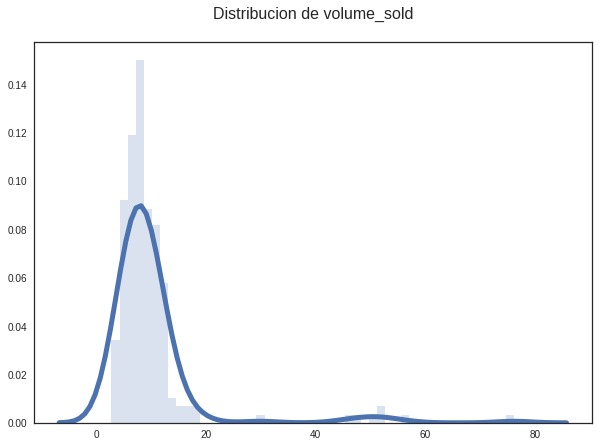

In [18]:
distribution_plotter('volume_sold', sales_data['volume_sold'])

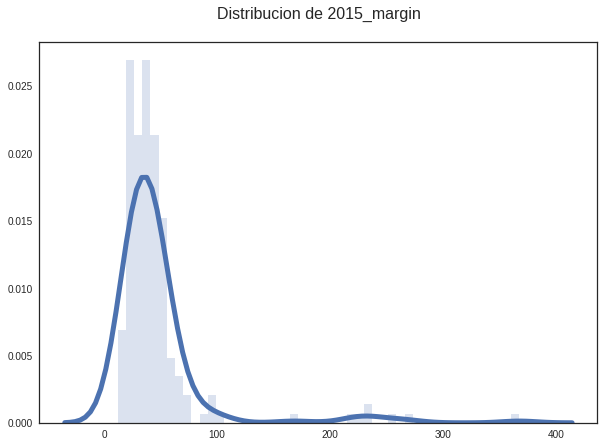

In [19]:
distribution_plotter('2015_margin', sales_data['2015_margin'])

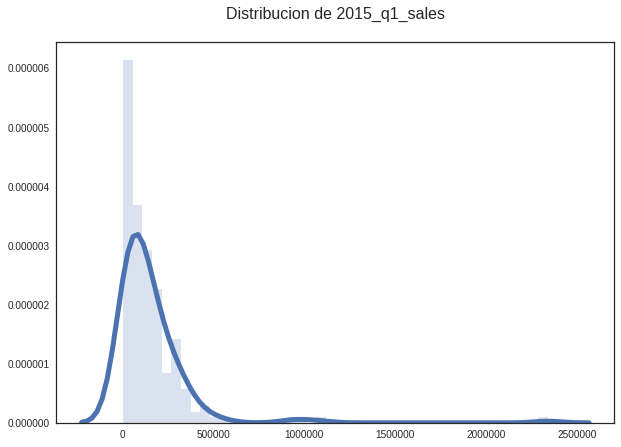

In [20]:
distribution_plotter('2015_q1_sales', sales_data['2015_q1_sales'])

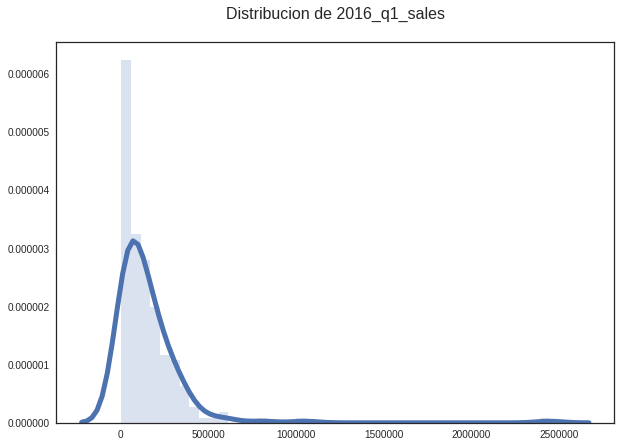

In [21]:
distribution_plotter('2016_q1_sales', sales_data['2016_q1_sales'])